# 문제풀이 Overview

* 이번 문제풀이에서는 이커머스 데이터를 이용해 주문 금액을 분석합니다.
* 문제를 본격적으로 풀기 전에 아래 코드를 실행해 `pandas` 라이브러리를 임포트하고 데이터를 읽어와주세요.

In [ ]:
import pandas as pd        # pandas: 데이터 분석 라이브러리

In [ ]:
order_details = pd.read_csv('https://raw.githubusercontent.com/datarian-kr/pandas/main/data/e-commerce/order_details.csv')

# 데이터 설명

> `order_details`는 이커머스의 주문 상세 내역이 담겨 있는 테이블 입니다.



**컬럼 상세**

모든 금액의 단위는 설명의 편의를 위해 '1달러'로 통일합니다.
 * `Order ID`: 주문 ID
 * `Amount`: 총 주문 금액
 * `Profit`: 판매 수익
 * `Quantity`: 주문량
 * `Category`: 상품 카테고리
 * `Sub-Category`: 세부 카테고리


참고: https://www.kaggle.com/benroshan/ecommerce-data/version/2?select=Order+Details.csv


# 데이터 미리보기

In [ ]:
order_details.head(5)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275,(1148),7,Furniture,Bookcases
1,B-25601,66,(12),5,Clothing,Stole
2,B-25601,8,(2),3,Clothing,Hankerchief
3,B-25601,80,(56),4,Electronics,Electronic Games
4,B-25602,168,(111),2,Electronics,Phones


# Q1. 탐색적 데이터 분석
[탐색적 데이터 분석(EDA, Exploratory Data Analysis)](https://en.wikipedia.org/wiki/Exploratory_data_analysis)이란 본격적인 데이터 분석을 시작하기 전에, 그래프나 기초 통계를 이용하여 주어진 자료를 파악하는 과정입니다.

`order_details`에는 어떤 주문 데이터가 들어있을까요? <br> 데이터는 몇 개인지, 어떤 컬럼들이 있는지, 중복된 값은 없는지 등 `describe()`, `unique()` 등을 이용하여 자유롭게 살펴보세요.

<br>

**아래의 간단한 질문들에 답하며 EDA를 시작해 볼까요?**
<br><br> 🇶 `order_details`에는 몇 개의 데이터가 있나요?
<br> 🇦 1,500개
<br><br> 🇶 평균 주문량이 어떻게 되나요?
<br> 🇦 인당 평균 287달러, 3.7개의 주문
<br><br> 🇶  누락된 데이터가 있나요?
<br> 🇦 없음
<br><br> 🇶  카테고리와 서브 카테고리에는 어떤 것들이 있나요?
<br> 🇦 카테고리 분포: 의류 > 전자 > 가구
<br> 🇦 카테고리 ['Furniture' 'Clothing' 'Electronics']
<br> 🇦 서브카테고리 ['Bookcases' 'Stole' 'Hankerchief' 'Electronic Games' 'Phones' 'Saree'
 'Trousers' 'Chairs' 'Kurti' 'T-shirt' 'Shirt' 'Leggings' 'Tables'
 'Printers' 'Accessories' 'Furnishings' 'Skirt']

In [ ]:
# 전체 데이터 수
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   object
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
dtypes: int64(2), object(4)
memory usage: 70.4+ KB


In [ ]:
# 평균 주문량
order_details.describe()

,Amount,Quantity
count,1500.000000,1500.000000
mean,287.668000,3.743333
std,461.050488,2.184942
min,4.000000,1.000000
25%,45.000000,2.000000
50%,118.000000,3.000000
75%,322.000000,5.000000
max,5729.000000,14.000000


In [ ]:
# 데이터 누락
order_details.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [ ]:
# 범주형 변수 'Category'의 분포 확인
category_distribution = order_details['Category'].value_counts()
print(category_distribution)

Clothing       949
Electronics    308
Furniture      243
Name: Category, dtype: int64


<Axes: >

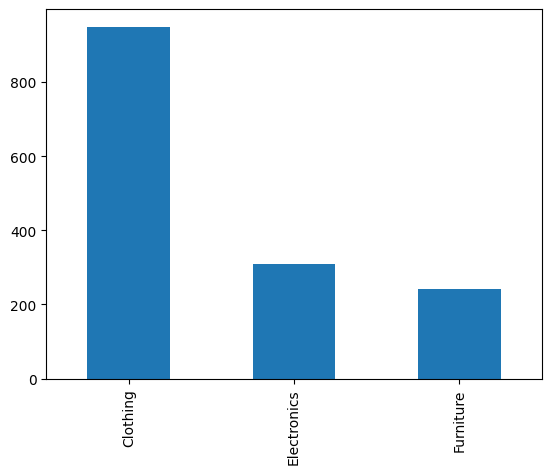

In [ ]:
# 바 차트
category_distribution.plot(kind='bar')

In [ ]:
# 수치형 변수 'Amount'의 분포 확인
amount_summary = order_details['Amount'].describe()
print(amount_summary)

count    1500.000000
mean      287.668000
std       461.050488
min         4.000000
25%        45.000000
50%       118.000000
75%       322.000000
max      5729.000000
Name: Amount, dtype: float64


<Axes: ylabel='Frequency'>

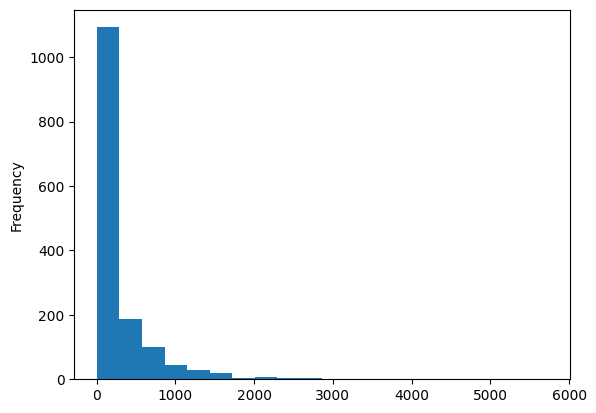

In [ ]:
# 히스토그램
order_details['Amount'].plot(kind='hist', bins=20)

In [ ]:
# 카테고리, 서브카테고리 종류 확인하기
unique_ctg = order_details[['Category', 'Sub-Category']].drop_duplicates()
unique_ctg

,Category,Sub-Category
0,Furniture,Bookcases
1,Clothing,Stole
2,Clothing,Hankerchief
3,Electronics,Electronic Games
4,Electronics,Phones
7,Clothing,Saree
9,Clothing,Trousers
10,Furniture,Chairs
16,Clothing,Kurti
17,Clothing,T-shirt


In [ ]:
# 카테고리, 서브카테고리 종류
print(order_details['Category'].unique())
# print(order_details['Sub-Category'].unique())

['Furniture' 'Clothing' 'Electronics']


# Q2. 주문 1건 당 주문 금액 분석

주문 건 당 주문 금액이 너무 적으면 배송 부담이 높아지고, 주문 1건 당 관리 비용이 올라가는 등 가변 비용이 증가하기 때문에 최대한 한 번의 주문에 많이 사도록 만들고 싶습니다. 일단 현황 파악이 필요합니다.

### Step 1. 주문 별로 주문금액, 주문량 합산하기

* 주문 별로 주문금액(`Amount`), 주문량(`Quantity`)을 구하고 `orders`라는 데이터 프레임에 저장하세요.

* Output 예시

| Order ID   |   Amount |   Quantity |
|:-----------|---------:|-----------:|
| B-25601    |     1429 |         19 |
| B-25602    |     3889 |         22 |
| B-25603    |     2025 |         25 |
| B-25604    |      222 |         11 |
| B-25605    |       75 |          7 |


In [ ]:
# 주문 별로 데이터 프레임에 저장
orders = order_details.groupby(['Order ID'])[['Amount', 'Quantity']].sum()
orders

,Amount,Quantity
Order ID,,
B-25601,1429,19
B-25602,3889,22
B-25603,2025,25
B-25604,222,11
B-25605,75,7
...,...,...
B-26096,1091,18
B-26097,1688,23
B-26098,1189,21


### Step 2. 주문금액 통계 계산하기

앞 단계에서 주문 별 주문 금액을 계산했습니다. 예를 들어 Order Id `B-25601`번 주문은 1429달러어치 상품을 샀고, Order Id `B-25602`번 주문은 3889달러어치 상품을 샀습니다.

**위에서 만든 데이터를 분석하여 아래 질문들에 답해주세요.**
<br><br> 🇶 현재 우리 쇼핑몰의 주문 1건당 평균 주문 금액은 얼마인가요?
<br> 🇦 863달러
<br><br> 🇶 가장 주문 금액이 많았던 주문의 주문 번호와 주문 금액을 알려주세요.
<br> 🇦 주문 번호는 B-26055이며, 주문 금액은 8502달러
<br><br> 🇶 가장 주문 금액이 적었던 주문의 주문 번호와 주문 금액을 알려주세요.
<br> 🇦 주문 번호는 B-26095이며, 주문 금액은 6달러

In [ ]:
# 주문 1건당 평균 주문 금액은 아래 표에서 mean 값이므로 863달러
orders.describe()
#order['Amount'].describe()

,Amount,Quantity
count,500.000000,500.00000
mean,863.004000,11.23000
std,1103.278652,10.11344
min,6.000000,1.00000
25%,123.750000,3.00000
50%,416.500000,8.00000
75%,1245.250000,16.00000
max,8502.000000,57.00000


In [ ]:
max_amount = orders['Amount'].max()
min_amount = orders['Amount'].min()

In [ ]:
# 가장 주문 금액이 컸던 주문의 주문 번호는 B-26055이며, 주문 금액은 8502달러
orders[orders['Amount'] == max_amount]

,Amount,Quantity
Order ID,,
B-26055,8502,57


In [ ]:
# 가장 주문 금액이 적은 주문의 주문 번호는 B-26095이며, 주문 금액은 6달러
orders[orders['Amount'] == min_amount]

,Amount,Quantity
Order ID,,
B-26095,6,1


### Step 3. 주문금액의 분포 그리기

우리는 보통 숫자들이 정규 분포 할 것을 생각하고 '평균'이라는 통계값에 의미를 둡니다. 분포의 중앙에 평균이 있고(아래 그래프에서 x축 중앙의 `μ`가 평균), 평균 근처에 많은 값들이 몰려 있으므로 이 '평균'이라는 숫자가 전체를 대표한다고 보는겁니다.

<div>
<img src="https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width="500"/>
</div>

그런데 실제 우리가 만나는 많은 데이터들은 정규분포와 거리가 멉니다.

예를 들어, 사람들의 자산 그래프를 상상해봅시다. 우리는 소수의 굉장한 부자들이 전 세계 부의 많은 부분을 소유하고 나머지 부를 많은 사람들이 나눠가지고 있다는 것을 압니다. 이런 상황에서 인류 자산의 평균이라는 숫자가 우리 모두의 자산을 반영하는 대표값이 될 수 있을까요? 아마 아닐겁니다.

우리의 주문 데이터(`orders`)는 어떨까요? 평균 863달러 근처에 많은 데이터들이 몰려있는 정규분포 모양을 그릴까요? 아니면, 인류의 자산 분포 처럼 대부분의 주문은 적은 금액에 몰려있고 소수의 높은 주문 금액이 있는 형태를 보일까요? 주문 금액 분포를 봤을 때, 평균 863달러는 어떤 의미를 가지나요?

Hint. 데이터의 분포를 확인하기 위해 판다스의 히스토그램 그리는 함수([`pandas.DataFrame.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)), 또는 `describe()` 함수를 활용하세요.

In [ ]:
orders['Amount'].describe()

count     500.000000
mean      863.004000
std      1103.278652
min         6.000000
25%       123.750000
50%       416.500000
75%      1245.250000
max      8502.000000
Name: Amount, dtype: float64

<Axes: >

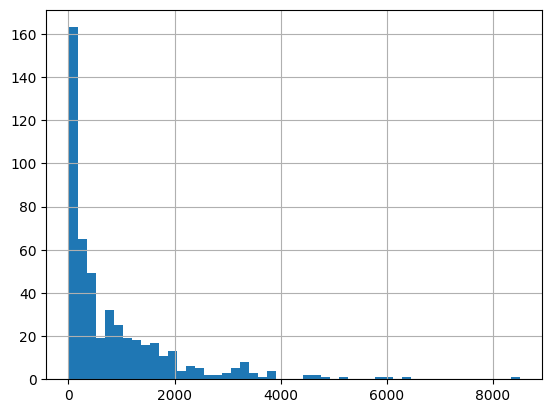

In [ ]:
# 이런 형태의 그래프에서 '평균'이라는 통계값은 데이터를 대표하지 못함
# 이런 경우 좀 더 다양한 통계값(사분위수 등)을 의사결정에 활용해야 합니다.
orders['Amount'].hist(bins=50)

# Q3. 추가분석




### Step 1. 카테고리 및 세부 카테고리별 주문 금액
주문 금액의 분포는 대략적으로 확인하였습니다. 평균보다는 4분위수 기준으로 살펴보는것이 맞다고 일단 결론 내렸지만, 해당 비지니시스는 의류, 전자제품, 가구로 다른 3가지 분류로 나뉘어있다.
<br>
<br>

**카테고리별로 세분화된 추가 분석이 필요합니다.**
<br><br> 🇶 카테고리 품목별 총 주문 금액은?
<br> 🇦 전자제품 165,267 / 의류 139,054 / 가구 127,181
<br><br> 🇶 카테고리 평균 판매 단가는?
<br> 🇦 전자제품 41,317 / 가구 31,795 / 의류 15,450
<br><br> 🇶 판매 TOP3는?
<br> 🇦 1위. Printers(전자제품) 58,252
<br> 🇦 2위. Bookcases(가구) 56,861
<br> 🇦 3위. Saree(의류) 53,511

In [ ]:
# 카테고리별 주문 금액 합산
category_amount = order_details.groupby('Category')['Amount'].sum()
category_amount

Category
Clothing       139054
Electronics    165267
Furniture      127181
Name: Amount, dtype: int64

In [ ]:
# 카테고리별 상품의 평균 판매 단가
category_amount_per = (order_details.groupby('Category')['Amount'].sum() / order_details.groupby('Category')['Sub-Category'].nunique()).round(0).astype(int)
category_amount_per

Category
Clothing       15450
Electronics    41317
Furniture      31795
dtype: int64

In [ ]:
# 전체 세부 카테고리별 주문 금액 합산
subcategory_amount = order_details.groupby('Sub-Category')['Amount'].sum()
subcategory_amount

Sub-Category
Accessories         21728
Bookcases           56861
Chairs              34222
Electronic Games    39168
Furnishings         13484
Hankerchief         14608
Kurti                3361
Leggings             2106
Phones              46119
Printers            58252
Saree               53511
Shirt                7555
Skirt                1946
Stole               18546
T-shirt              7382
Tables              22614
Trousers            30039
Name: Amount, dtype: int64

In [ ]:
# order_details 데이터프레임을 가정하고, 'Category'와 'Sub-Category'를 기준으로 그룹화하고 'Amount'를 합산
subcategory_amount = order_details.groupby(['Category', 'Sub-Category'])['Amount'].sum().reset_index()

# 'Amount'를 기준으로 정렬
subcategory_amount = subcategory_amount.sort_values(by='Amount', ascending=False)

# 결과 출력
print(subcategory_amount)


       Category      Sub-Category  Amount
12  Electronics          Printers   58252
13    Furniture         Bookcases   56861
3      Clothing             Saree   53511
11  Electronics            Phones   46119
10  Electronics  Electronic Games   39168
14    Furniture            Chairs   34222
8      Clothing          Trousers   30039
16    Furniture            Tables   22614
9   Electronics       Accessories   21728
6      Clothing             Stole   18546
0      Clothing       Hankerchief   14608
15    Furniture       Furnishings   13484
4      Clothing             Shirt    7555
7      Clothing           T-shirt    7382
1      Clothing             Kurti    3361
2      Clothing          Leggings    2106
5      Clothing             Skirt    1946


### Step 2. 시계열 분석
'Order Date' 데이터 추가시 분석 가능.

In [ ]:
# # 주문 날짜 및 시간을 datetime 형식으로 변환
# order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])
# order_details['Order Date']

In [ ]:
# 월별 주문 금액 통계
# monthly_amount = order_details.resample('M', on='Order Date')['Amount'].sum()
# monthly_amount

### Step 2. 이상치 탐지
Z-점수가 2.142198인 0달러 주문은 극단 값으로 판단될 수 있습니다. 이 주문을 분석하고, 왜 이런 낮은 주문 금액이 발생했는지 조사할 필요가 있을 것입니다.

Z-점수가 4.509322인 1,496달러 주문은 높은 주문 금액을 가진 주문으로 분석됩니다. 이 주문에 대한 자세한 내용을 확인하고, 해당 주문이 왜 다른 주문들과 큰 차이를 보이는지 조사할 필요가 있을 것입니다.

In [ ]:
# Z-점수를 이용한 이상치 탐지
from scipy import stats
z_scores = stats.zscore(order_details['Amount'])
z_scores

0       2.142198
1      -0.480949
2      -0.606791
3      -0.450574
4      -0.259642
          ...   
1495    1.187537
1496    4.509322
1497    1.172349
1498   -0.550379
1499   -0.467931
Name: Amount, Length: 1500, dtype: float64

### Step 2. 고객별 분석

In [ ]:
# 고객별 주문 패턴 및 지출
customer_order_stats = order_details.groupby('Order ID').agg({'Amount': ['sum', 'mean', 'count']})
customer_order_stats

Amount                  
            sum        mean count
Order ID                         
B-25601    1429  357.250000     4
B-25602    3889  777.800000     5
B-25603    2025  253.125000     8
B-25604     222  111.000000     2
B-25605      75   75.000000     1
...         ...         ...   ...
B-26096    1091  181.833333     6
B-26097    1688  241.142857     7
B-26098    1189  198.166667     6
B-26099    3417  854.250000     4
B-26100     934  311.333333     3

[500 rows x 3 columns]

In [ ]:
# 'Amount_mean' 열에서 소수점을 없애기
# customer_order_stats['mean'] = customer_order_stats['mean'].round().astype(int)
# customer_order_stats

In [ ]:
# 컬럼명 변경
customer_order_stats.columns = customer_order_stats.columns.map('_'.join)
customer_order_stats.columns
customer_order_stats
# 정렬
# sorted_stats = customer_order_stats.sort_values(by=['Amount_sum', 'Amount_mean', 'Amount_count'], ascending=False)
# sorted_stats

,Amount_sum,Amount_mean,Amount_count
Order ID,,,
B-25601,1429,357.250000,4
B-25602,3889,777.800000,5
B-25603,2025,253.125000,8
B-25604,222,111.000000,2
B-25605,75,75.000000,1
...,...,...,...
B-26096,1091,181.833333,6
B-26097,1688,241.142857,7
B-26098,1189,198.166667,6


---
판다스에서 제공하는 데이터셋과 데이터리안에서 제공하는 문제풀이를 활용하였습니다.
<br>
`#데이터리안` `#판다스공부` `#TIL`